In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Spam is the target , message is the feature

In [11]:
data_path = ("amazon_cells_labelled.txt")

amazon_raw = pd.read_csv(data_path, delimiter= '\t', header = None)
amazon_raw.columns = ['message', 'spam']

In [12]:
amazon_raw.head()

,message,spam
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [13]:
keywords = ['excellent', 'happy', 'pleased', 'good', 'great', 'best', 'charm']

for key in keywords:
    amazon_raw[str(key)] = amazon_raw.message.str.contains(' ' + str(key) + ' ', case = False)
    
amazon_raw['allcaps'] = amazon_raw.message.str.isupper()
amazon_raw['message'] = (amazon_raw['message'] == 'message')
data = amazon_raw[keywords + ['allcaps']]
target = amazon_raw['message']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)
print('For Amazon reviews, Number of mislabelled points out of a total {} points : {}'.format(data.shape[0], (target != y_pred).sum()))

For Amazon reviews, Number of mislabelled points out of a total 1000 points : 0


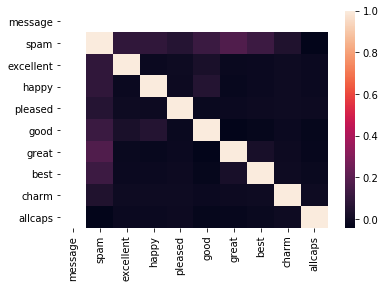

In [14]:
sns.heatmap(amazon_raw.corr())

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[1000]], dtype=int64)

In [16]:
def confmatrix(data, y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    print(len(y_pred))
    for i in range(0,len(y_pred)):
        if data[i] == y_pred[i] and data[i] == 1:
            tp = tp + 1
            #print(tp)
        if data[i] == y_pred[i] and data[i] == 0:
            tn = tn + 1
            #print(tn)
        if data[i] != y_pred[i] and data[i] == 0:
            fp = fp + 1
            #print(fp)
        if data[i] != y_pred[i] and data[i] == 1:
            fn = fn + 1
            #print(fn)
#print(target)
    print(fn)
confmatrix(target, y_pred)
# must have recall, precision, specificity, and sensitivity must be within function

1000
0
